### First Part:

I decided to save the lines as a **dictionary** a bit because I wanted to practice the use of dictionaries, 
and becauseI felt it would look more orderly and professional.

Another decision was to use **pandas** to do this assignment. It was a good excuse to start learning it.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


lines = [
    {"k":-1 ,"m":0, "color":"red", "label":"my_line"},
    {"k":-0.489, "m":0, "color": "blue", "label":"f(x)"},
    {"k":-2, "m":0.16, "color":"green", "label":"g(x)"}, 
    {"k":800, "m":-120, "color":"black", "label":"h(x)"}
    ]

### Functions:

*Obs. This first function is from the first version of the script and I left it just for reference.*

In [2]:
def classify(row,k,m):
    
    pointx = row["X"]
    pointy = row["Y"]
    line_y = k*pointx +m
    if line_y >= pointy: 
        return 0
    else: 
        return 1

This second function loops through the lines dictionary and prints them all in the graph. 
It is currently commented out in the main script but it should work fine

In [3]:
def plot(df):
    x_min = (df["X"].min())
    x_max = (df["X"].max())

    df0 = df[df["Label"]==0]
    df1 = df[df["Label"]==1]

    for line in lines:
        y_start = line["k"]*x_min+line["m"]
        y_end = line["k"]*x_max+line["m"]
        plt.plot([x_min,x_max],[y_start,y_end], c = line["color"], label = line["label"])

    plt.scatter(df0["X"],df0["Y"],c = "Orange", label = "Points Below the Line")
    plt.scatter(df1["X"],df1["Y"], c = "DarkCyan", label = "Points Above the Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.ylim(-8,8)
    plt.show()

This function generates a separate graph for each line as a visual reinforcement for the data visualization at the end.

In [4]:
def plot2(df,line,column):

    plt.figure(figsize=(5,3))
    x_min = (df["X"].min())
    x_max = (df["X"].max())

    df0 = df[df[column]==0]
    df1 = df[df[column]==1]

    y_start = line["k"]*x_min+line["m"]
    y_end = line["k"]*x_max+line["m"]
    plt.plot([x_min,x_max],[y_start,y_end], c = line["color"], label = line["label"])

    plt.scatter(df0["X"],df0["Y"],c = "Orange", label = "Points Below the Line")
    plt.scatter(df1["X"],df1["Y"], c = "DarkCyan", label = "Points Above the Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.ylim(df["Y"].min() -1, df["Y"].max() +1)
    plt.show()

### The Core script

What happens here is quite straightforward: 
- we tell the script to open the file (trying to catch errors in case the file is not found)
and save the infotmation as "df"
- Then, .dropna(), a very useful function from pandas I learned from a Youtube video, helps us getting rid of wrong or empty entries.
- We rename the columns to make it better for our purposes.
- Then we classify the points based on each line we have in our dictionary:
we create a new column called *Label_* + the name of the line and on that column add all the relative labels for each point. 
- We show a graph for each line and its statistics (how many points are 0 and how many are 1) with another pandas function called .value_counts().
- LAstly, we create a new file in which we send the classified dataframe.


Classification for my_line, k:-1, m:0:

Label_my_line
1    302
0    298
Name: count, dtype: int64


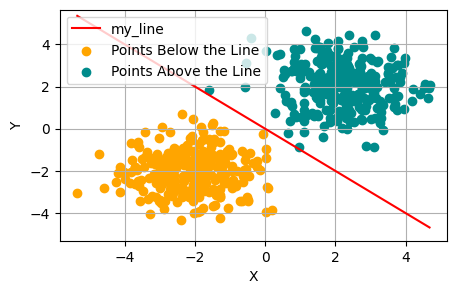


Classification for f(x), k:-0.489, m:0:

Label_f(x)
1    301
0    299
Name: count, dtype: int64


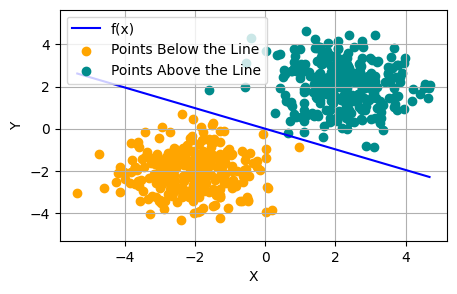


Classification for g(x), k:-2, m:0.16:

Label_g(x)
1    301
0    299
Name: count, dtype: int64


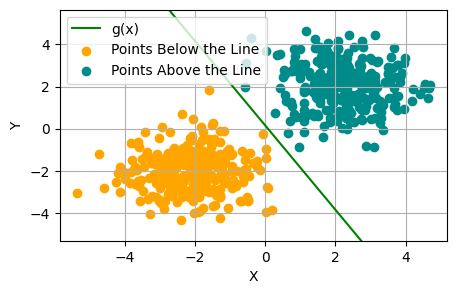


Classification for h(x), k:800, m:-120:

Label_h(x)
1    302
0    298
Name: count, dtype: int64


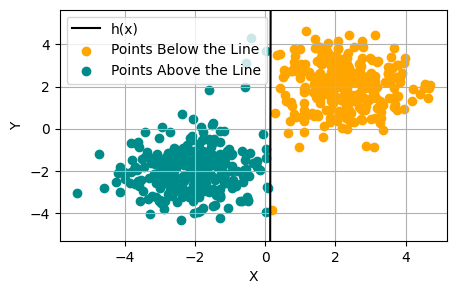

In [6]:
def main():
    try:
        df = pd.read_csv("unlabelled_data.csv", header = None)
    except FileNotFoundError:
        print("The file 'unlabelled_data.csv' could not be found in the script folder.")

    df = df.dropna()
    df.rename(columns={0:"X",1:"Y"}, inplace=True)
    
    for line in lines:
        k = line["k"]
        m = line ["m"]
        column = f"Label_{line['label']}"

        df[column] = df.apply(lambda row:1 if row["Y"] > ( k * row["X"] +m) else 0, axis=1)
        
        print(f"\nClassification for {line['label']}, k:{line["k"]}, m:{line["m"]}:\n")
        print(df[column].value_counts())
        plot2(df,line,column)

    #plot(df)
    df.to_csv("labelled_data.csv", index=False)


if __name__ == "__main__":
    main()

### Final Considerations:

### Svenska:

Vid en granskning av de data som returneras från skriptet framgår en sak tydligt, särskilt tack vare visualiseringen.

Det ser ut som att alla fyra linjerna delar datan relativt jämnt i hälften. Linjen h(x) ger dock ett omvänt klassificeringsresultat för nästan alla punkter jämfört med de andra tre linjerna. (Jag antog först att det var något fel med färgerna i plotten, men genom att kontrollera labelled_data.csv-filen kunde jag se att den returnerade motsatt etikett, eller åtminstone för de punkter jag kunde kontrollera, jämfört med de andra tre linjerna).

Medan de andra linjerna verkar följa inriktningen på gapet mellan klustren, har linjen h(x) en extremt stor lutning (vilket gjorde att scatterplotten behövde begränsas i storlek) och ser ut att löpa nästan parallellt med y-axeln. Den delar punkterna i positiva och negativa x-värden, medan de andra linjerna verkar vara mer nyanserade.

Angående frågan om det finns ett bästa val av linje, skulle jag, av de analyserade linjerna, säga alla utom h(x).
Om jag skulle behöva välja en, skulle jag välja **g(x)** eftersom den, till skillnad från de andra, åtminstone visuellt verkar ge den tydligaste separationen mellan de två klustren och lämnar gott om utrymme emellan dem, medan de andra giltiga linjerna verkar vara lite på gränsen, nuddar vissa punkter och lämnar en liten osäkerhetsmarginal.

För att besvara hur många sådana linjer som kan finnas, skulle jag tro att så länge de passerar genom gapet mellan klustren och följer rätt orientering, kan de betraktas som giltiga val.

Eftersom jag inte vet vad punkterna representerar är det svårt att säga, men för maskininlärning och prediktion borde man vilja följa synliga mönster. Detta gäller tills jag har lärt mig hur det verkligen fungerar.

### English:

Looking at the data returned from the script one thing is pretty obvious, especially thanks to the visualization:
While it looks like all 4 lines split the data quite evenly in half, the line h(x) gives an inverted result for almost all points ( I thought there was something wrong with the colors in the beginning, but then checking the labelled_data.csv file I could see it returned the opposite of each label, or at least those I could check, compared to the other 3 lines). 
Also while the other lines seem to follow the alignment of the gap between the clusters of points, the h(x) line, which also has an enormous slope (which made it so that the scatter plot needed to be limited in size), seems to run almost parallel to the y axis, splitting the points in x positive and x negative, while the other lines seem to be a bit more nuanced.

So, to the question whether there is a best choice for a line, I would say, of those analyzed, all excepth h(x).

If I had to pick one, I would go with **g(x)** because unlike the others it seems at least visually to give the clearest separation between the two clusters leaving good space in between them, while the other valid ones seem to be a bit on the edge, touching some points and leaving a small margin of uncertainty.

To answer how many lines can there be, I would think as long as they pass in the gap between the clusters, following the right orientation, they could be considered valid choices.

Then again, not knowing what the points represent it's hard to say, but one would think for machine learning and prediction, one would like to follow visible patterns. That until I really learn how it really works. 